## 04 Model training

Here I explore models and results.

In [6]:
# 📚 Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 🤖 Machine learning

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance_matrix
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering


from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
#pandas.set_option('display.max_rows', df.shape[0]+1) # display all rows 
warnings.filterwarnings('ignore') # ignore warnings

In [7]:
data_df=pd.read_csv(r'C:\Users\luisj\Desktop\Ironhack\Archivos Ejercicios\09_Final project\Data\cities_clean_model.csv')

In [8]:
numeric_df = data_df.select_dtypes(include=[float, int])

In [9]:
numeric_df.shape

(850, 12)

In [10]:
#Trying to represent the groups. in two axis

### this is how my data looks like before the model training 

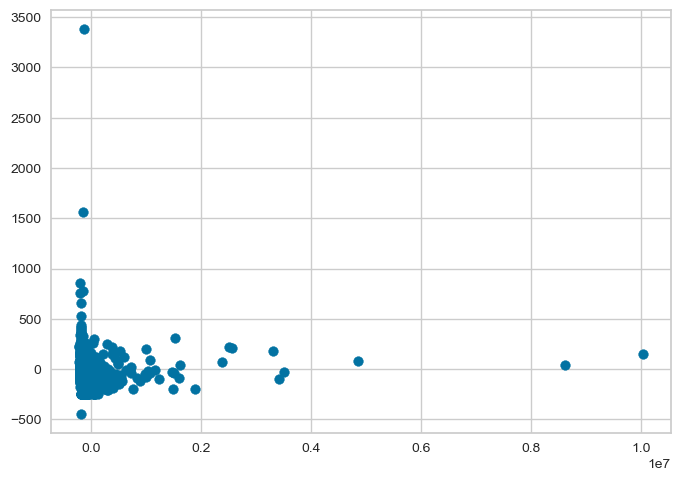

In [12]:
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(numeric_df)
df = pd.DataFrame(df)
df.shape

#Getting unique labels
 
#u_labels = np.unique(clusters)
 
#plotting the results:
plt.scatter(df[0],df[1])
#for i in u_labels:
    #plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.legend()
plt.show()

## 03.01 No data transformation

### Model 1 KNN

In [13]:
# train and predict
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(numeric_df)
clusters = kmeans.predict(numeric_df)

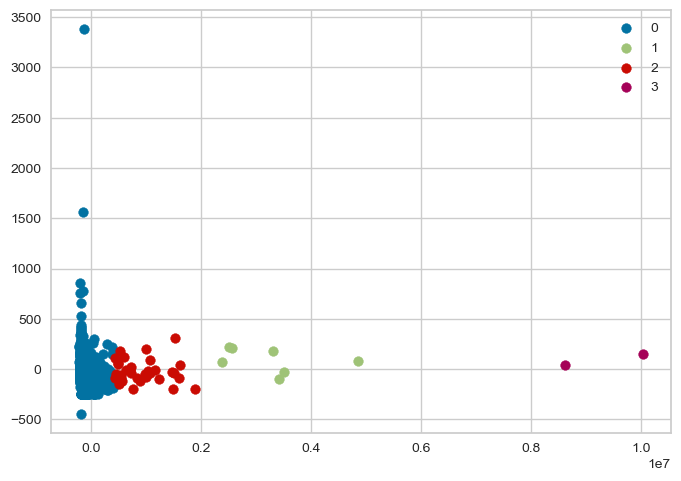

In [14]:
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(numeric_df)
df = pd.DataFrame(df)
df.shape

#Add clusters to dataframe 
df['clusters'] = clusters

#Getting unique labels
u_labels = np.unique(clusters)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

In [15]:
# Check the elbow to fit K

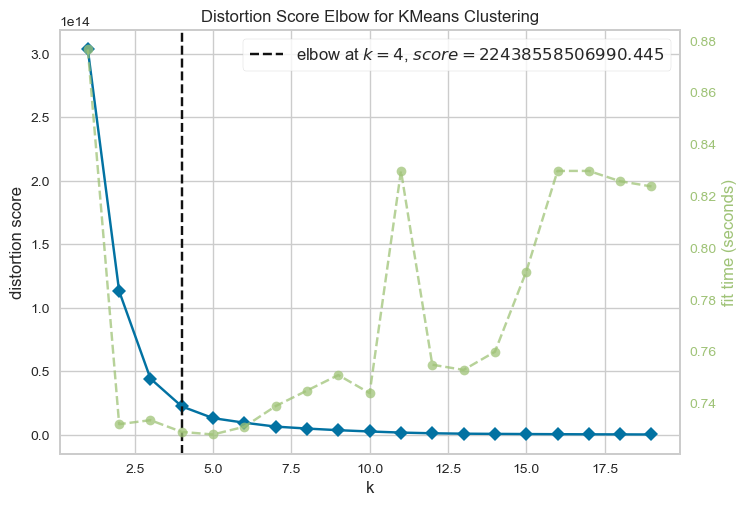

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(kmeans, k=(1,20))

visualizer.fit(numeric_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

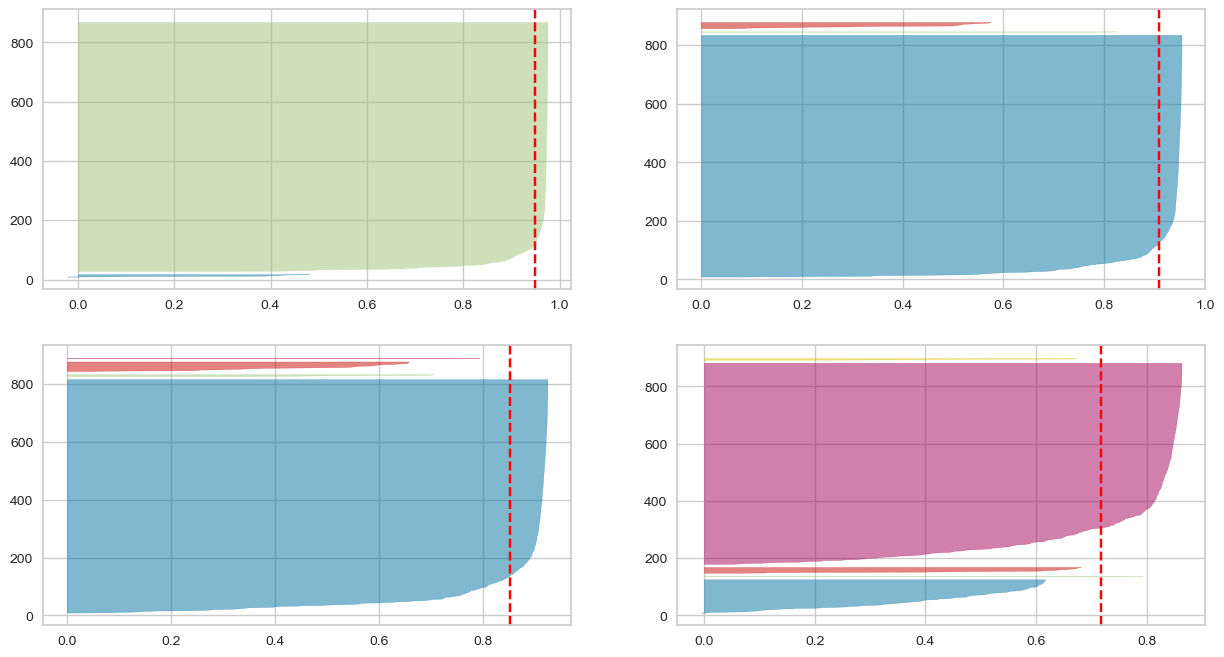

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(numeric_df)

In [20]:
#This confirms that K=4 is the best otption and is not good

In [22]:
#Try which features are problematic for my model 
#kmean= KMeans(6)
#kmean.fit(X)
#labels=kmean.labels_
clusters=pd.concat([numeric_df, pd.DataFrame({'cluster':clusters})], axis=1)
clusters.head()
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

ValueError: If using all scalar values, you must pass an index

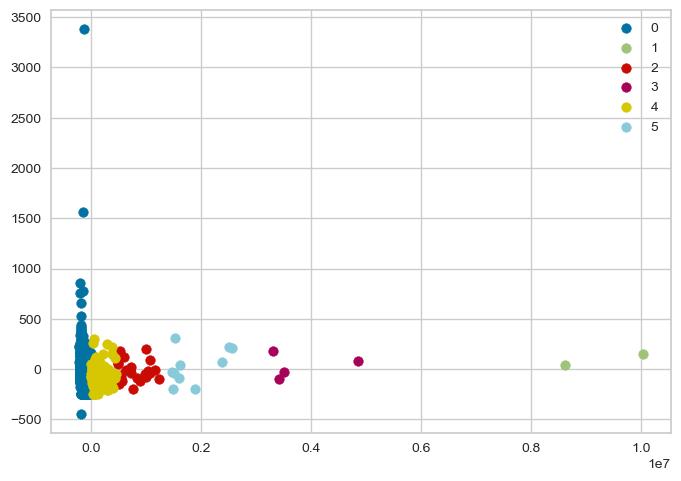

In [23]:
#trying 6 clusters

# train and predict
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(numeric_df)
clusters = kmeans.predict(numeric_df)
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(numeric_df)
df = pd.DataFrame(df)
df.shape

#Add clusters to dataframe 
df['clusters'] = clusters

#Getting unique labels
u_labels = np.unique(clusters)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

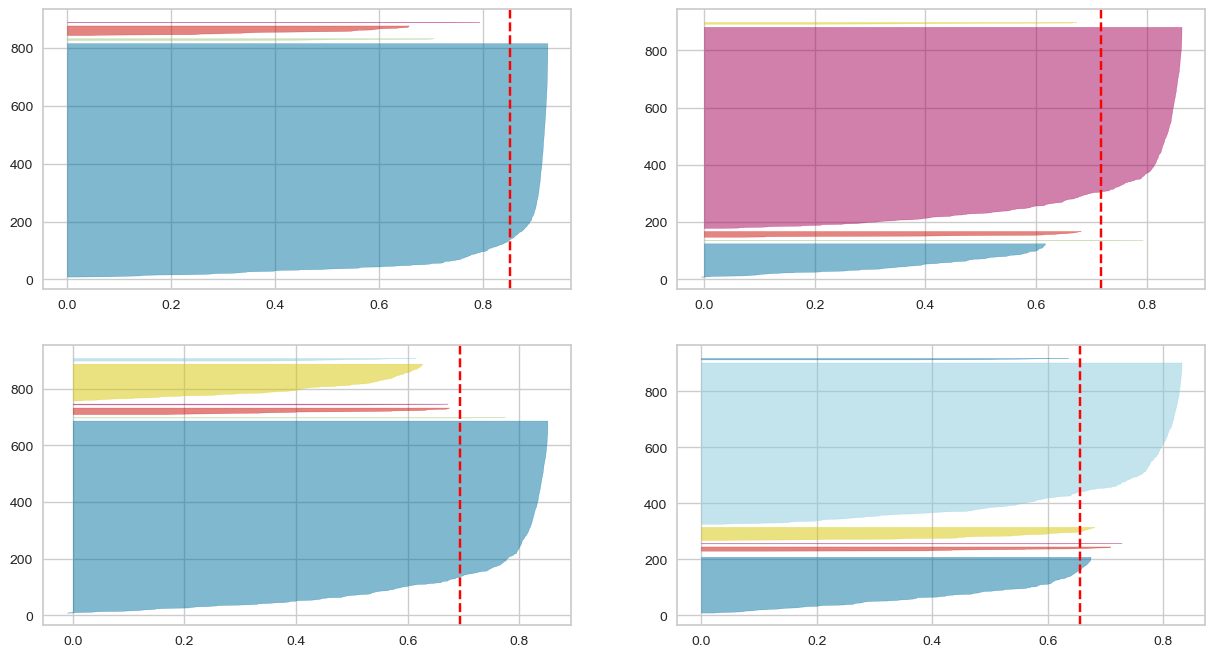

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i,value in enumerate([4,5,6,7]):
    row_idx = i // 2
    col_idx = i % 2
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=value, random_state=42)
    #q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row_idx][col_idx])
    visualizer.fit(numeric_df)

I am not convinced with these klusters. silohuette looks not nice.

### Model 2 DBSCAN

Not applicable before the transformation because all the variables need to be in the same scale. this method is using distances.

In [ ]:
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(numeric_df)
df =np.array(df)
#df = pd.DataFrame(df)
#df.shape

#Train model
modeldb = DBSCAN(eps=0.5, min_samples=5) #Those are the values by default
labels = modeldb.fit_predict(df)
labels


In [ ]:
np.unique(labels)

In [ ]:
#arr_substituted = np.where(labels == -1, 7, np.where(labels == 0, 8, labels))

In [ ]:
#arr_substituted

In [ ]:
#df['clusters'] = arr_substituted

In [ ]:
##Load Data
#pca = PCA(2)
 
##Transform the data
#df = pca.fit_transform(numeric_df)
df = pd.DataFrame(df)
#df.shape
#
#Add clusters to dataframe 
df['clusters'] = labels

#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

In [ ]:
#Not working DBSCAN I need to scale the data

### Model 3 Gaussian Mixture

not working. Probably needs a transformation

In [25]:
#Load Data
#data = numeric_df
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(numeric_df)
df =np.array(df)
#df = pd.DataFrame(df)
#df.shape

#Train model
modelGM = GaussianMixture() 
labels = modelGM.fit_predict(df)
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
numeric_df.sample(20)

## 03.02 data transformation Min Max Scaler

In [26]:
scaler = MinMaxScaler()
scaler_result=scaler.fit(numeric_df)
scaled_numeric_df=scaler.fit_transform(numeric_df)

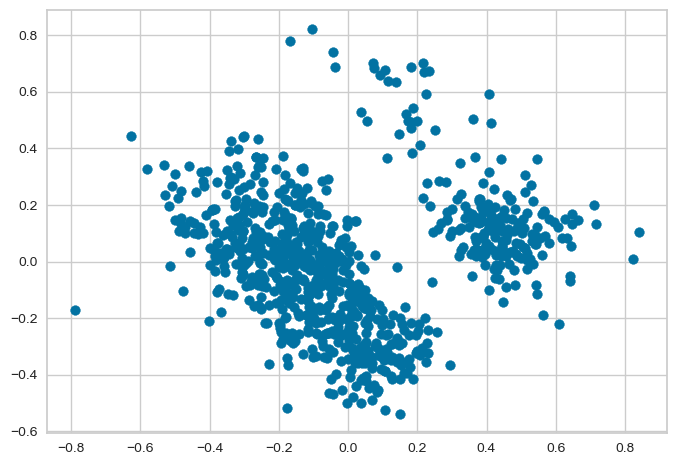

In [27]:
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scaled_numeric_df)
df = pd.DataFrame(df)
df.shape

#Getting unique labels
 
#u_labels = np.unique(clusters)
 
#plotting the results:
plt.scatter(df[0],df[1])
#for i in u_labels:
    #plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.legend()
plt.show()

Happy it looks nice

### 1 Try K means with scaled data 

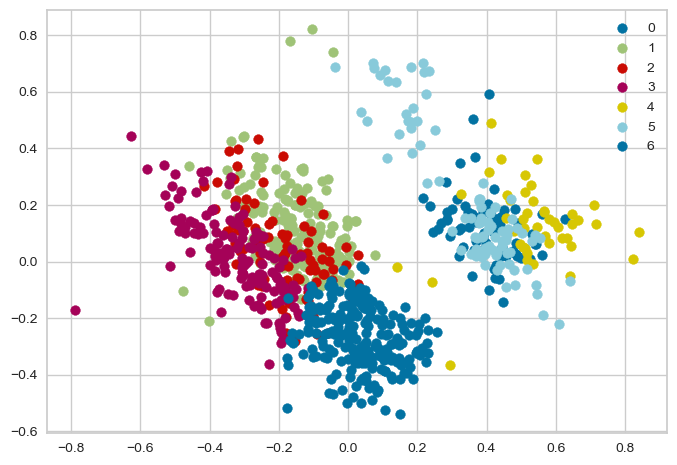

In [38]:
# train and predict
kmeans = KMeans(n_clusters=7, random_state=20)
kmeans.fit(scaled_numeric_df)
clusters = kmeans.predict(scaled_numeric_df)

#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scaled_numeric_df)
df = pd.DataFrame(df)
df.shape

#Add clusters to dataframe 
df['clusters'] = clusters

#Getting unique labels
u_labels = np.unique(clusters)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

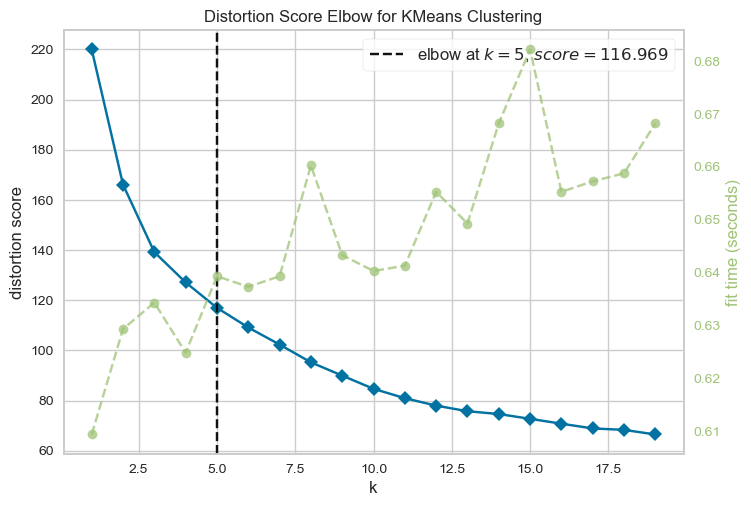

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(kmeans, k=(1,20))
visualizer.fit(scaled_numeric_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

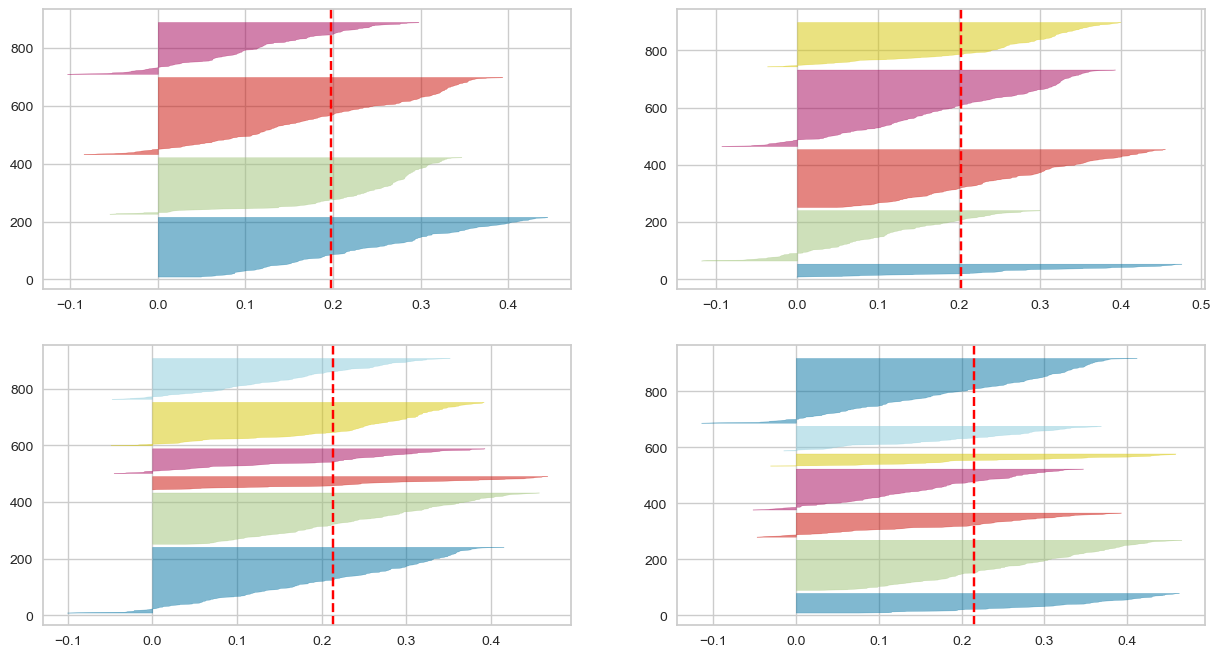

In [40]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i,value in enumerate([4,5,6,7]):
    row_idx = i // 2
    col_idx = i % 2
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=value, random_state=20)
    #q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row_idx][col_idx])
    visualizer.fit(scaled_numeric_df)

The 7 clusters are not similar but the 4 clusters contains different values that are not well clustered. Negative values in the silohuette in cluster 3. This is problematic. Anyways I think is better 4 cluster than 6 they look more similar in bandwith

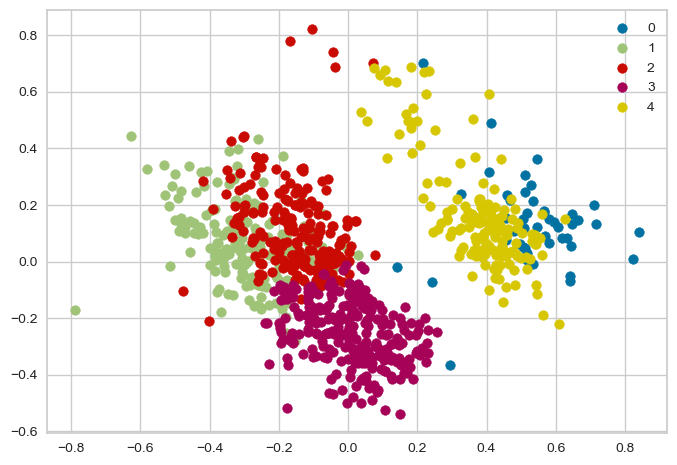

In [136]:
# train and predict
kmeans = KMeans(n_clusters=5, random_state=20)
kmeans.fit(scaled_numeric_df)
clusters = kmeans.predict(scaled_numeric_df)

#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scaled_numeric_df)
df = pd.DataFrame(df)
df.shape

#Add clusters to dataframe 
df['clusters'] = clusters

#Getting unique labels
u_labels = np.unique(clusters)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

two clusters are too few

### 2 Try DBSCAN with scaled data 

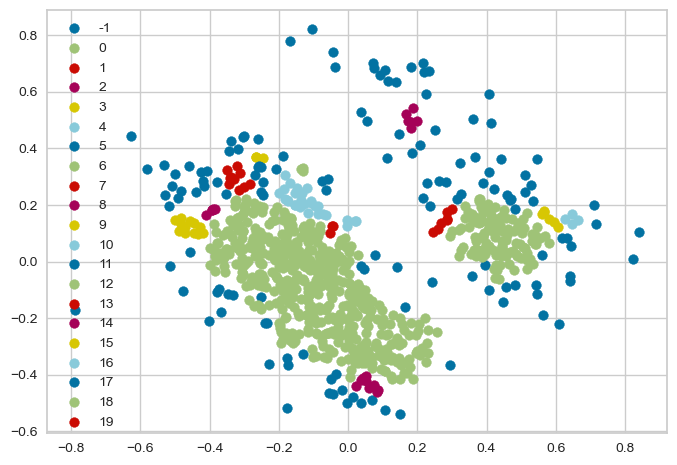

In [53]:
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scaled_numeric_df)
df =np.array(df)
#df = pd.DataFrame(df)
#df.shape

#Train model
modeldb = DBSCAN(eps=0.03, min_samples=3) #Those are the values by default
labels = modeldb.fit_predict(df)
labels

##Load Data
#pca = PCA(2)
 
##Transform the data
#df = pca.fit_transform(numeric_df)
df = pd.DataFrame(df)
#df.shape
#
#Add clusters to dataframe 
df['clusters'] = labels

#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

DBscan looks not so nice because there is a big cluster and the others are small.
I have tried with different eps and min_samples

### try Fuzzy clustering. 

In [ ]:
#!pip install fuzzy-c-means

In [72]:
import numpy as np
from fcmeans import FCM
my_model = FCM(n_clusters=4) # we use two cluster as an example
my_model.fit(scaled_numeric_df) ## X, numpy array. rows:samples columns:features

In [73]:
centers = my_model.centers
labels = my_model.predict(scaled_numeric_df)

In [74]:
labels

array([1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 1, 3, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 3, 0, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 0, 3, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 3, 0, 0, 1, 3, 1, 0, 0, 1, 0, 3, 1, 3, 1, 0, 1, 1,
       0, 0, 0, 3, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 3, 0, 1, 0,
       1, 1, 1, 1, 0, 3, 1, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,

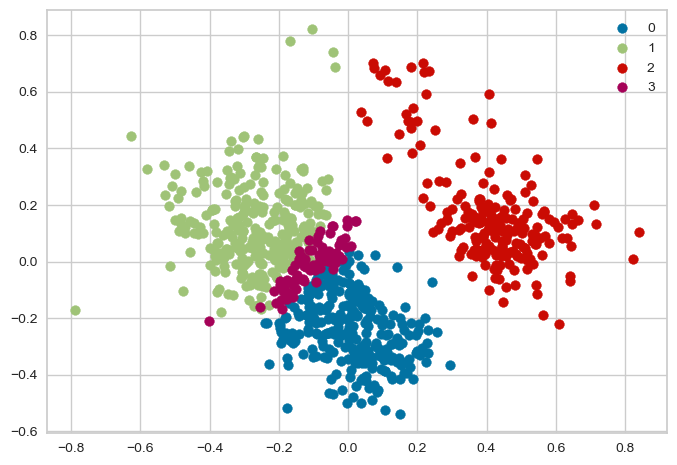

In [75]:
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scaled_numeric_df)
df =np.array(df)
#df = pd.DataFrame(df)
#df.shape

 
##Transform the data
#df = pca.fit_transform(numeric_df)
df = pd.DataFrame(df)
#df.shape
#
#Add clusters to dataframe 
df['clusters'] = labels

#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

In [80]:
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([288, 284, 200,  78], dtype=int64))

This clusters looks nice. only problem is that cluster 2 is quite small but could work

#### Try affinity propagation

In [81]:
#Load Data
#data = numeric_df
pca = PCA(2)

#Transform the data
df = pca.fit_transform(scaled_numeric_df)
df =np.array(df)
#dfa = pd.DataFrame(df)
#df.shape

#Train model
modelGM = GaussianMixture() 
labels = modelGM.fit_predict(df)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [82]:
clustering = AffinityPropagation(random_state=5).fit(scaled_numeric_df)
AffinityPropagation(random_state=5)

AffinityPropagation(random_state=5)

In [83]:
clustering

AffinityPropagation(random_state=5)

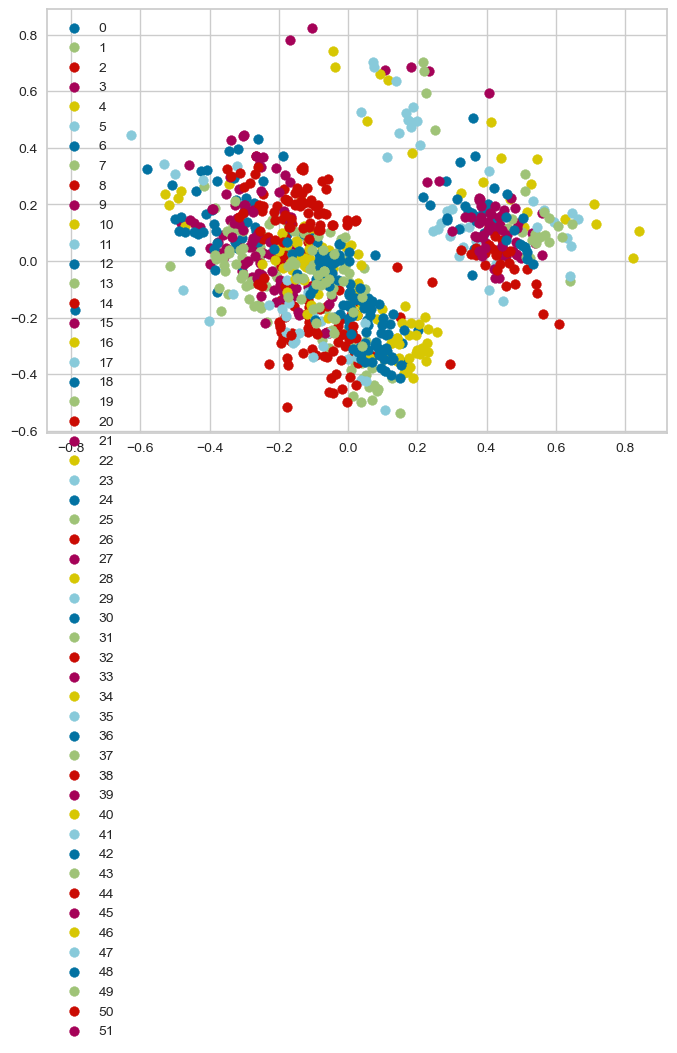

In [84]:
#Train model
modelap = AffinityPropagation(damping=0.5).fit(scaled_numeric_df)
labels = modelap.fit_predict(scaled_numeric_df)
labels

##Load Data
#pca = PCA(2)
 
##Transform the data
#df = pca.fit_transform(numeric_df)
df = pd.DataFrame(df)
#df.shape
#
#Add clusters to dataframe 
df['clusters'] = labels

#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

#### SpectralClustering

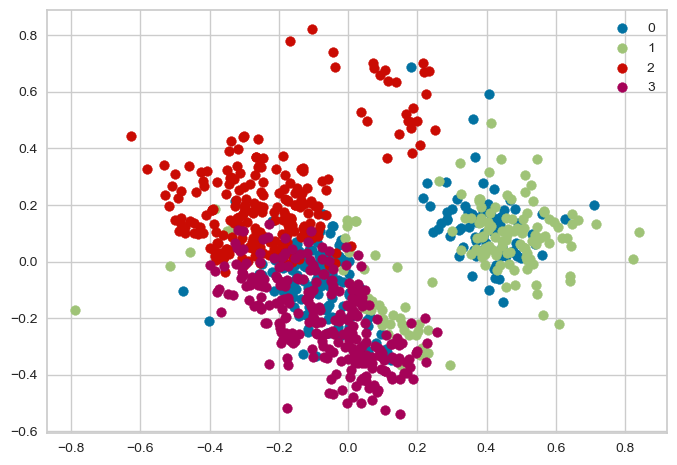

In [86]:
#Train model SpectralClustering
modelsc = SpectralClustering(n_clusters=4,assign_labels='cluster_qr',random_state=42).fit(scaled_numeric_df)
labels =modelsc.fit_predict(scaled_numeric_df)
labels

##Load Data
#pca = PCA(2)
 
##Transform the data
#df = pca.fit_transform(numeric_df)
df = pd.DataFrame(df)
#df.shape
#
#Add clusters to dataframe 
df['clusters'] = labels

#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

In [ ]:
#meh

#### HDBSCAN

In [ ]:
##Train model SpectralClustering
#modelhdbscan = HDBSCAN(min_cluster_size=20)
#labels =modelhdbscan.fit_predict(scaled_numeric_df)
#labels
#
###Load Data
##pca = PCA(2)
# 
###Transform the data
##df = pca.fit_transform(numeric_df)
#df = pd.DataFrame(df)
##df.shape
##
##Add clusters to dataframe 
#df['clusters'] = labels
#
##Getting unique labels
#u_labels = np.unique(labels)
# 
##plotting the results:
##plt.scatter(df[0],df[1])
#for i in u_labels:
#    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)
#
#plt.legend()
#plt.show()

## 03.03 data transformation MaxAbsScaler

In [87]:
scalerabs = MaxAbsScaler()
scaler_result=scalerabs.fit(numeric_df)
scalerabs_numeric_df=scaler.fit_transform(numeric_df)

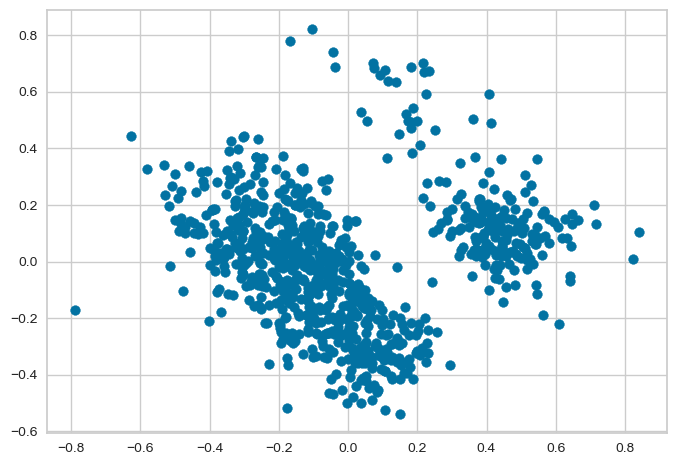

In [88]:
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scalerabs_numeric_df)
df = pd.DataFrame(df)
df.shape

#Getting unique labels
 
#u_labels = np.unique(clusters)
 
#plotting the results:
plt.scatter(df[0],df[1])
#for i in u_labels:
    #plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.legend()
plt.show()

In [89]:
looks similar. I try now standarscaler

SyntaxError: invalid syntax (1759074340.py, line 1)

## 03.04 Data transformation Standarscaler

In [90]:
scalerss = StandardScaler()
scaler_result=scalerss.fit(numeric_df)
scalerss_numeric_df=scalerss.fit_transform(numeric_df)

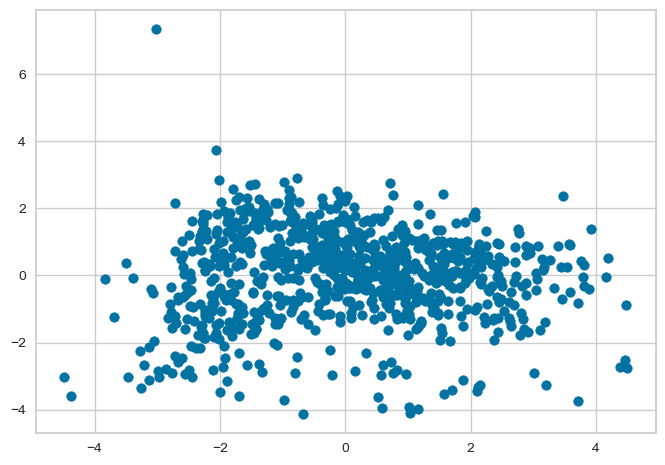

In [91]:
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scalerss_numeric_df)
df = pd.DataFrame(df)
df.shape

#Getting unique labels
 
#u_labels = np.unique(clusters)
 
#plotting the results:
plt.scatter(df[0],df[1])
#for i in u_labels:
    #plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.legend()
plt.show()

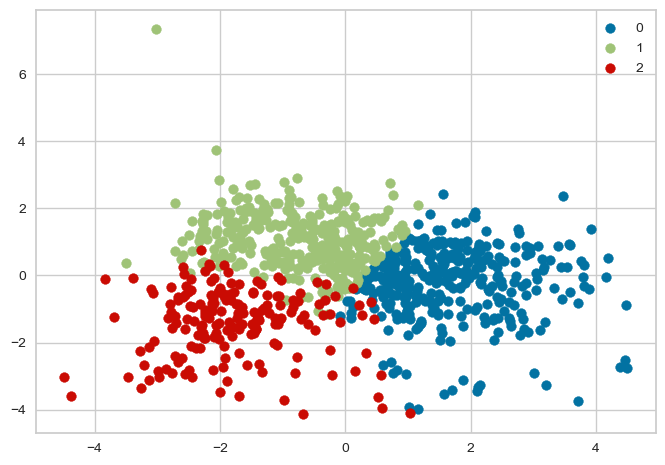

In [98]:
# train and predict
kmeans = KMeans(n_clusters=3,n_init='auto', random_state=42)
kmeans.fit(scalerss_numeric_df)
clusters = kmeans.predict(scalerss_numeric_df)

#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scalerss_numeric_df)
df = pd.DataFrame(df)
df.shape

#Add clusters to dataframe 
df['clusters'] = clusters

#Getting unique labels
u_labels = np.unique(clusters)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

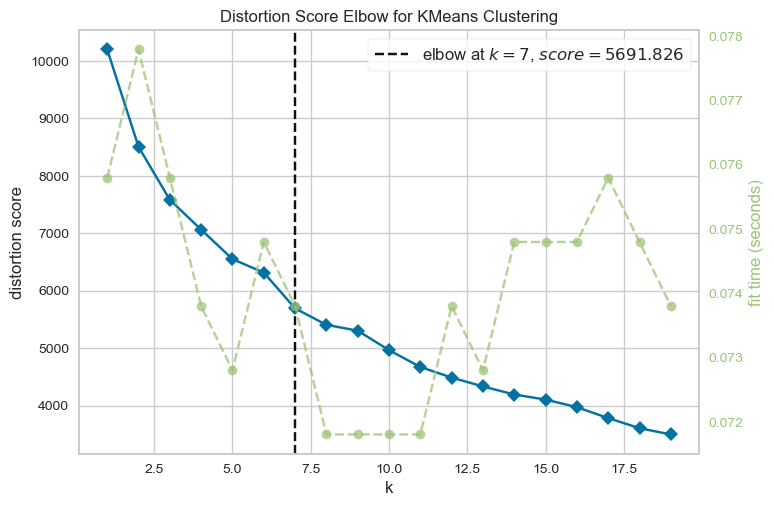

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [99]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(kmeans, k=(1,20))

visualizer.fit(scalerss_numeric_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

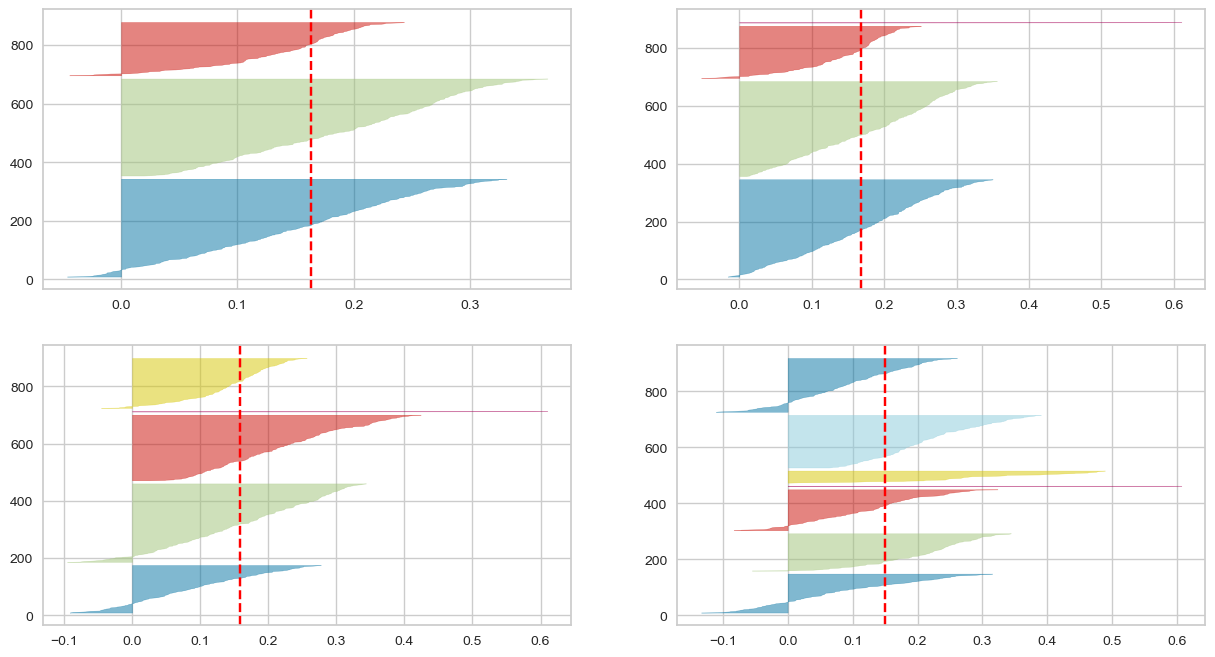

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i,value in enumerate([3,4,5,7]):
    row_idx = i // 2
    col_idx = i % 2
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=value,n_init='auto', random_state=42)
    #q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row_idx][col_idx])
    visualizer.fit(scalerss_numeric_df)

I like the 3 cluster with standard scaler. I will use this for the model. Is the elbow and the silohuette looks ok.

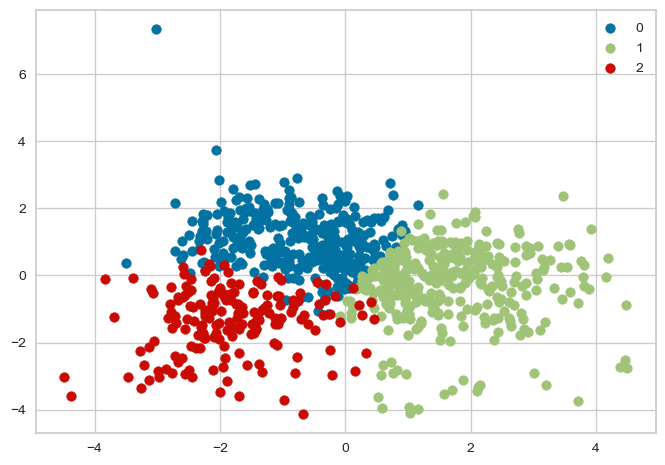

In [138]:
# train and predict
kmeans = KMeans(n_clusters=3,n_init='auto', random_state=20)
kmeans.fit(scalerss_numeric_df)
clusters = kmeans.predict(scalerss_numeric_df)

#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scalerss_numeric_df)
df = pd.DataFrame(df)
df.shape

#Add clusters to dataframe 
df['clusters'] = clusters

#Getting unique labels
u_labels = np.unique(clusters)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

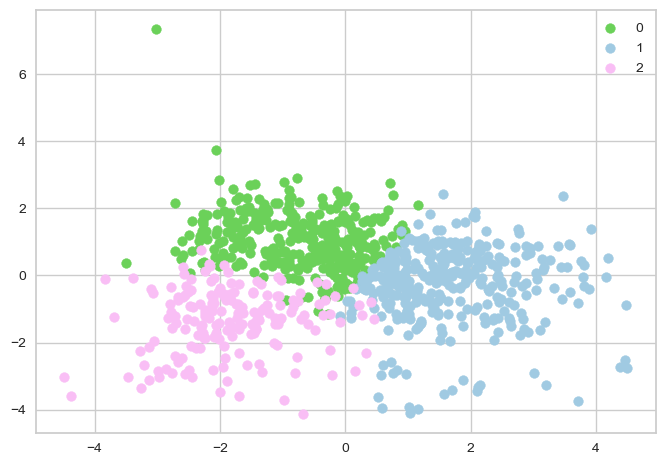

In [139]:
colors = ['#6bd159', '#a0cae2', '#f9bef5']
# Plotting the results:
for i, color in zip(u_labels, colors):
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i, color=color)

plt.legend()
plt.show()

In [121]:
#See how many cities are in each cluster
df['clusters'].value_counts()

1    339
0    332
2    179
Name: clusters, dtype: int64

In [130]:
data_model=pd.concat([df,data_df],axis=1)

In [131]:
data_model.sample(2)

,0,1,clusters,Unnamed: 0,"Population on the 1st of January, total",Prop. of working age population qualified at level 5 or 6 ISCED,Share of students in higher education in the total population (per 1000 persons),Women per 100 men,Median population age,Average size of households,Unemployment rate,Proportion of households that are 1-person households,Number of registered cars per 1000 population,People killed in road accidents per 10000 pop.,Nationals as a proportion of population,Crude birth rate (per 1000 inhabitants),cities_name
330,1.218249,0.843267,1,FR013C,245109.0,43.0,130.0,115.0,38.0,2.0,16.0,50.0,515.17,0.16,91.0,11.0,Tours
276,-0.228041,1.535691,0,ES066C,176418.0,51.0,82.0,110.0,46.4,2.0,12.0,32.0,442.11,0.06,92.0,7.0,Burgos


### Try Dbscan

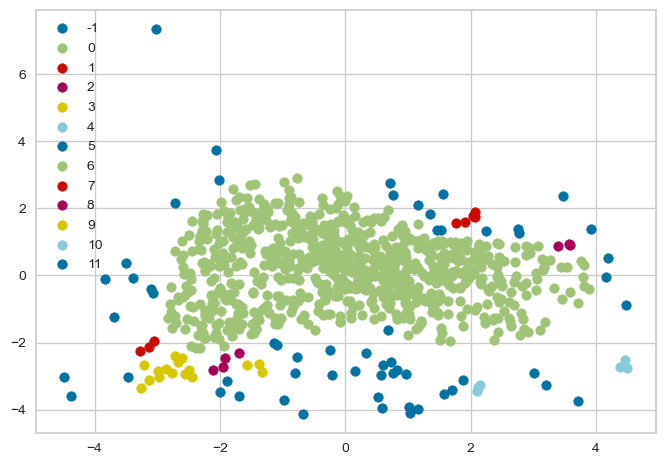

In [110]:
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scalerss_numeric_df)
df =np.array(df)
#df = pd.DataFrame(df)
#df.shape

#Train model
modeldb = DBSCAN(eps=0.3, min_samples=3) #Those are the values by default
labels = modeldb.fit_predict(df)
labels

##Load Data
#pca = PCA(2)
 
##Transform the data
#df = pca.fit_transform(numeric_df)
df = pd.DataFrame(df)
#df.shape
#
#Add clusters to dataframe 
df['clusters'] = labels

#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

### try Fuzzy clustering. 

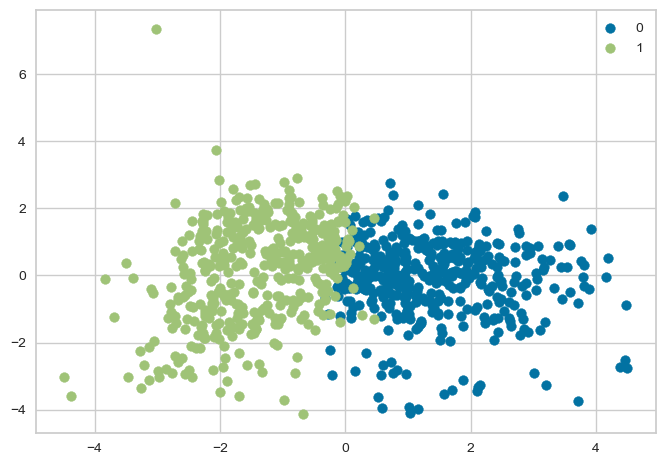

In [116]:
my_model = FCM(n_clusters=2) # we use two cluster as an example
my_model.fit(scalerss_numeric_df) ## X, numpy array. rows:samples columns:features

centers = my_model.centers
labels = my_model.predict(scalerss_numeric_df)

#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(scalerss_numeric_df)
df =np.array(df)
#df = pd.DataFrame(df)
#df.shape

 
##Transform the data
#df = pca.fit_transform(numeric_df)
df = pd.DataFrame(df)
#df.shape
#
#Add clusters to dataframe 
df['clusters'] = labels

#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
#plt.scatter(df[0],df[1])
for i in u_labels:
    plt.scatter(df.loc[df['clusters'] == i, 0], df.loc[df['clusters'] == i, 1], label=i)

plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
<b>Output:</b> Export the data for the data model to excel for Tableau
</div>

In [125]:
import_tableau = pd.read_excel(r'C:\Users\luisj\Desktop\Ironhack\Archivos Ejercicios\09_Final project\Tableau\Sources\df_tableau_variables.xlsx')

In [126]:
import_tableau.sample(2)

,Unnamed: 0,Unnamed: 1,Number of Children 0-4 in day care (publ.&priv) per 1000 children 0-4,Number of children 0-4 in day care or school,Share of students in higher education in the total population (per 1000 persons),"Students in higher education (ISCED level 5-8), total","Students in higher education (ISCED level 5-8), male","Students in higher education (ISCED level 5-8), female","Share of early leavers from education and training, total -%","Share of early leavers from education and training, male -%","Share of early leavers from education and training, female -%","Persons aged 25-64 with ISCED level 0, 1 or 2 as the highest level of education",Prop. of working age population qualified at level 3 or 4 ISCED,Persons aged 25-64 with ISCED level 3 or 4 as the highest level of education,Prop. of working age population qualified at level 5 or 6 ISCED,"Persons aged 25-64 with ISCED level 5, 6, 7 or 8 as the highest level of education",Total number of hours of sunshine per day,Average temperature of warmest month - degrees,Average temperature of coldest month - degrees,Rainfall - litre/m²,Number of days ozone O3 concentrations exceed 120 µg/m³,Number of hours nitrogen dioxide NO2 concentrations exceed 200 µg/m³,Number of days particulate matter PM10 concentrations exceed 50 µg/m³,Accumulated ozone concentration in excess 70 µg/m³,Annual average concentration of NO2 (µg/m³),Annual average concentration of PM10 (µg/m³),Prop. of residents exposed to air traffic noise >55 dB(A) at night time,Prop. of residents exposed to rail traffic noise >65 dB(A) at day time,Prop. of residents exposed to road traffic noise >65 dB(A) at day time,Prop. of residents exposed to road traffic noise >55 dB(A) at night time,Prop. of residents exposed to rail traffic noise >55 dB(A) at night time,Total use of water - m³,Price of a m³ of domestic water - Euro,Share of the urban waste water load (in population equivalents) treated according to the applicable standard -%,Share of population connected to potable drinking water system - %,Share of population connected to sewerage treatment system - %,"Municipal waste generated (domestic and commercial), total",Share of land (%): Continuous residential urban fabric,Share of land (%): Discontinuous residential urban fabric,"Share of land (%): Industrial, commercial, public, military and private units",Share of land (%): Transport infrastructure,Share of land (%): Other artificial areas,Share of land (%): Green urban areas and sports and leisure facilities,Share of land (%): Agricultural areas,Share of land (%): Natural areas,Infant mortality rate (per 1000 live births),Infant Mortality per year,Crude birth rate (per 1000 inhabitants),Number of live births per year,Number of adolescent births (from mothers aged 19 or less),Number of deaths per year under 65 due to diseases of the circulatory or respiratory systems,Total deaths under 65 per year,"Total deaths under 65 per year, male","Total deaths under 65 per year, female",Total deaths per year,"Total deaths per year, male","Total deaths per year, female",Crude death rate (per 1000 inhabitants),Private households (excluding institutional households),Proportion of households that are 1-person households,One person households,Average size of households,Prop. of households that are lone-parent households,Lone parent private households (with children aged 0 to under 18),Prop. households that are lone-pensioner households,Lone pensioner (above retirement age) households,Proportion of households with children aged 0-17,Households with children aged 0 to under 18,Lone parent households per 100 households with children aged 0-17,Population living in private households (excluding institutional households),Median disposable annual household income - EUR,Average disposable annual household income - EUR,Share of persons living in households with very low work intensity - %,Share of persons at risk of poverty after social transfers -%,Share of severely materially deprived per

In [132]:
dataoutput_tableau=pd.merge(data_model,import_tableau,on='Unnamed: 0')
dataoutput_tableau.sample(2)


,0,1,clusters,Unnamed: 0,"Population on the 1st of January, total_x",Prop. of working age population qualified at level 5 or 6 ISCED_x,Share of students in higher education in the total population (per 1000 persons)_x,Women per 100 men_x,Median population age_x,Average size of households_x,Unemployment rate_x,Proportion of households that are 1-person households_x,Number of registered cars per 1000 population_x,People killed in road accidents per 10000 pop._x,Nationals as a proportion of population_x,Crude birth rate (per 1000 inhabitants)_x,cities_name,Unnamed: 1,Number of Children 0-4 in day care (publ.&priv) per 1000 children 0-4,Number of children 0-4 in day care or school,Share of students in higher education in the total population (per 1000 persons)_y,"Students in higher education (ISCED level 5-8), total","Students in higher education (ISCED level 5-8), male","Students in higher education (ISCED level 5-8), female","Share of early leavers from education and training, total -%","Share of early leavers from education and training, male -%","Share of early leavers from education and training, female -%","Persons aged 25-64 with ISCED level 0, 1 or 2 as the highest level of education",Prop. of working age population qualified at level 3 or 4 ISCED,Persons aged 25-64 with ISCED level 3 or 4 as the highest level of education,Prop. of working age population qualified at level 5 or 6 ISCED_y,"Persons aged 25-64 with ISCED level 5, 6, 7 or 8 as the highest level of education",Total number of hours of sunshine per day,Average temperature of warmest month - degrees,Average temperature of coldest month - degrees,Rainfall - litre/m²,Number of days ozone O3 concentrations exceed 120 µg/m³,Number of hours nitrogen dioxide NO2 concentrations exceed 200 µg/m³,Number of days particulate matter PM10 concentrations exceed 50 µg/m³,Accumulated ozone concentration in excess 70 µg/m³,Annual average concentration of NO2 (µg/m³),Annual average concentration of PM10 (µg/m³),Prop. of residents exposed to air traffic noise >55 dB(A) at night time,Prop. of residents exposed to rail traffic noise >65 dB(A) at day time,Prop. of residents exposed to road traffic noise >65 dB(A) at day time,Prop. of residents exposed to road traffic noise >55 dB(A) at night time,Prop. of residents exposed to rail traffic noise >55 dB(A) at night time,Total use of water - m³,Price of a m³ of domestic water - Euro,Share of the urban waste water load (in population equivalents) treated according to the applicable standard -%,Share of population connected to potable drinking water system - %,Share of population connected to sewerage treatment system - %,"Municipal waste generated (domestic and commercial), total",Share of land (%): Continuous residential urban fabric,Share of land (%): Discontinuous residential urban fabric,"Share of land (%): Industrial, commercial, public, military and private units",Share of land (%): Transport infrastructure,Share of land (%): Other artificial areas,Share of land (%): Green urban areas and sports and leisure facilities,Share of land (%): Agricultural areas,Share of land (%): Natural areas,Infant mortality rate (per 1000 live births),Infant Mortality per year,Crude birth rate (per 1000 inhabitants)_y,Number of live births per year,Number of adolescent births (from mothers aged 19 or less),Number of deaths per year under 65 due to diseases of the circulatory or respiratory systems,Total deaths under 65 per year,"Total deaths under 65 per year, male","Total deaths under 65 per year, female",Total deaths per year,"Total deaths per year, male","Total deaths per year, female",Crude death rate (per 1000 inhabitants),Private households (excluding institutional households),Proportion of households that are 1-person households_y,One person households,Average size of households_y,Prop. of households that are lone-parent households,Lone parent private households (with children aged 0 to under 18),Prop. households that are lone-pensioner household

In [133]:
dataoutput_tableau.to_excel(r'C:\Users\luisj\Desktop\Ironhack\Archivos Ejercicios\09_Final project\Data\df_tableau_variables_2.xlsx', index=False, sheet_name='Sheet1')

In [134]:
dataoutput_tableau=data_df
df_standarkmeans=df.rename(columns={0:'pca0standarkmeans',1:'pca1strandarkmeans','clusters':'clustersstandarkmeans'})
dataoutput_tableau=pd.concat([dataoutput_tableau,df_standarkmeans],axis=1)
dataoutput_tableau.reset_index(drop=True, inplace=True)
dataoutput_tableau.sample(3)

,Unnamed: 0,"Population on the 1st of January, total",Prop. of working age population qualified at level 5 or 6 ISCED,Share of students in higher education in the total population (per 1000 persons),Women per 100 men,Median population age,Average size of households,Unemployment rate,Proportion of households that are 1-person households,Number of registered cars per 1000 population,People killed in road accidents per 10000 pop.,Nationals as a proportion of population,Crude birth rate (per 1000 inhabitants),cities_name,pca0standarkmeans,pca1strandarkmeans,clustersstandarkmeans
56,CZ007C,104802.0,24.0,56.0,106.2,39.7,2.0,9.0,35.0,416.65,0.58,94.0,11.0,Liberec,-0.115765,-0.614666,0
391,FR077C,37464.0,33.0,6.0,101.5,41.0,2.0,16.0,39.0,555.36,0.00,76.0,10.0,Saint-Louis-Bâle (French part),0.983949,0.176320,1
5,AT006C,96640.0,19.0,136.0,113.5,44.5,2.0,10.0,46.0,521.82,0.31,88.0,9.0,Klagenfurt,-0.345258,1.504722,0


In [135]:
#dictionary_2 = dictionary_df.set_index('Column Name')['label'].to_dict()
#dataoutput_tableau = df_model_output.rename(columns=dictionary_2)
dataoutput_tableau.to_excel(r'C:\Users\luisj\Desktop\Ironhack\Archivos Ejercicios\09_Final project\Data\data_model_result_tableau.xlsx', index=False, sheet_name='dictionary')